# Matplotlib

Lib de python para realizar graficos (2D) sirve de backend ploty + seaborn

- Dispersion (scatter plots)
- Linea
- Barras
- Histogramas
- Boxplot
- Violin
- Mapas de Calor
- Torta (Pastel)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Numpy
Trabajo con vectores, matrices y tensores

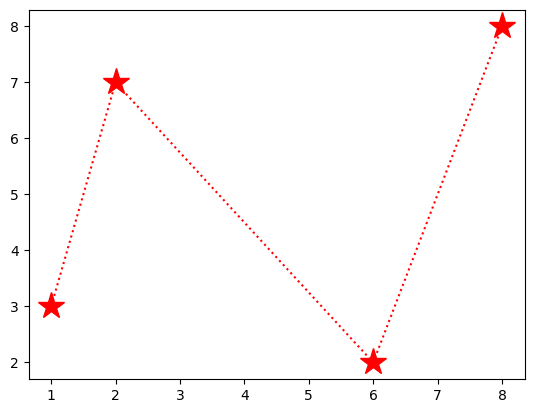

In [8]:
x = np.array([1,2,6,8])
y = np.array([3,7,2,8])

plt.plot(x,y, color='r', linestyle='dotted', ms=20, marker='*')
plt.show()

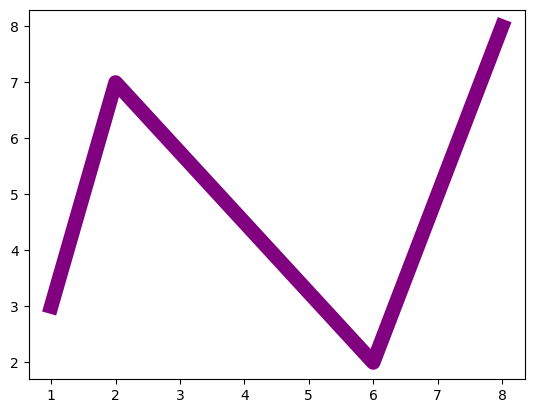

In [12]:
plt.plot(x,y, linewidth=10.5, c='purple')
plt.show()

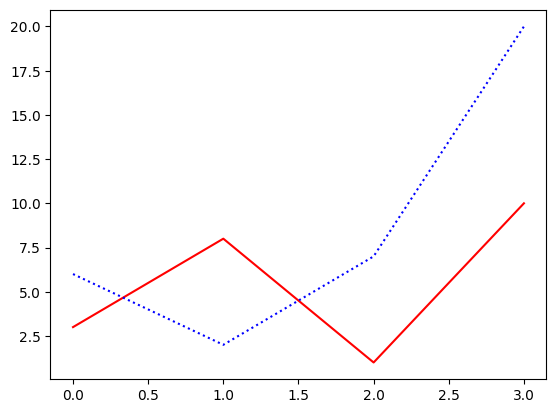

In [13]:
y1 = np.array([3,8,1,10])
y2 = np.array([6,2,7,20])

plt.plot(y1, c='r')
plt.plot(y2, c='blue', linestyle='dotted')
plt.show()

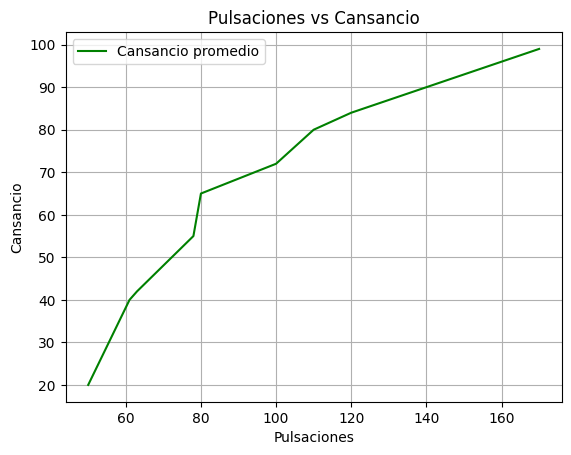

In [15]:
x = np.array([50,61,63,78,80,100,110,120,170])
y = np.array([20,40,42,55,65,72,80,84,99])

plt.plot(x,y, c='green', label='Cansancio promedio')
plt.xlabel("Pulsaciones")
plt.ylabel("Cansancio")
plt.grid()
plt.title("Pulsaciones vs Cansancio", loc='center')
plt.legend(loc='best')
plt.show()

## Subplots
con subplot() podemos dibujar multiples graficos en una sola figura
La funcion subplot toma 3 argumentos (posicionales) que describen un layout que esta organizado en filas y columnas

plt.subplot(1,2,1) filas, columnas y posicion del grafico

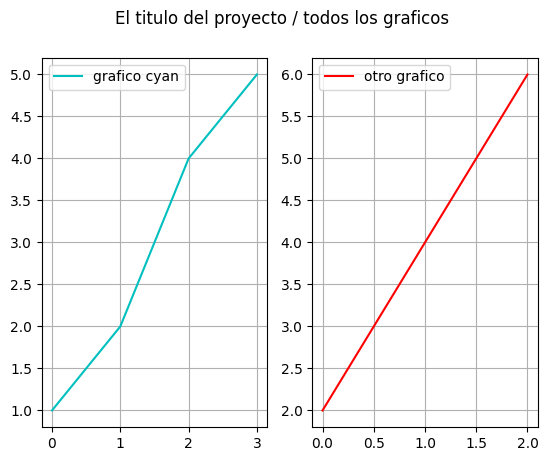

In [22]:
x1 = np.array([0,1,2,3])
y1 = np.array([1,2,4,5])
x2 = np.array([0,1,2])
y2 = np.array([2,4,6])

plt.subplot(1,2,1)
plt.plot(x1,y1,c='c',label='grafico cyan')#primer columna de mi layout
plt.grid()
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(x2,y2, c='r', label='otro grafico')
plt.grid()
plt.legend(loc='best')
plt.suptitle("El titulo del proyecto / todos los graficos")
plt.show()

# Tipos de graficos

- Scatter [dispersion]
- Bars
- Histogramas
- Cajas

In [23]:
x = np.array([1,2,5,7,10,12,20])
y = np.array([100,200,480,570, 600,1000,2000])

len(x), len(y)

(7, 7)

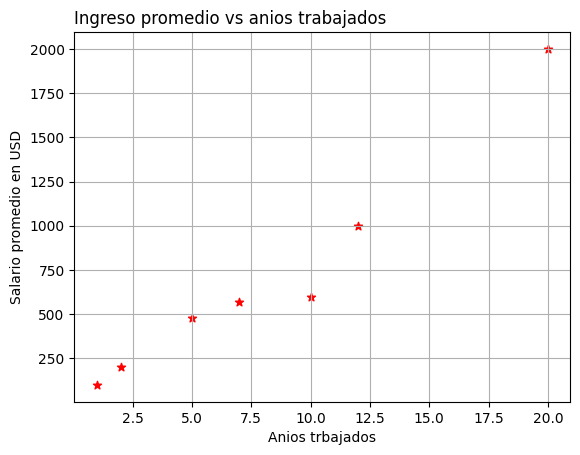

In [25]:
plt.scatter(x,y, c='r', marker='*')
plt.title("Ingreso promedio vs anios trabajados", loc='left')
plt.xlabel("Anios trbajados")
plt.ylabel("Salario promedio en USD")
plt.grid()
plt.show()

In [31]:
import pandas as pd
import ssl



In [32]:
ssl._create_default_https_context = ssl._create_unverified_context
data = pd.read_csv("https://interactivechaos.com/sites/default/files/data/iris_data_set.csv")

In [33]:
data.shape

(150, 5)

In [34]:
data.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
16,5.4,3.9,1.3,0.4,setosa
84,5.4,3.0,4.5,1.5,versicolor
129,7.2,3.0,5.8,1.6,virginica


In [36]:
data.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

Vamos a cruzar el sepal_length vs sepal_width (x,y), vamos a empezar a mezclar este grafico con el color

In [35]:
set(data.species) # "set" es un tipo de dato que no admite duplicados

{'setosa', 'versicolor', 'virginica'}

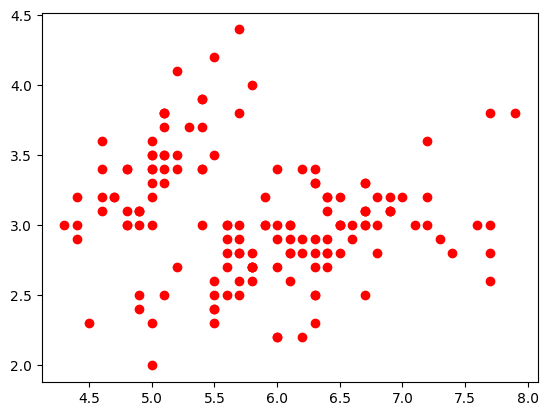

In [37]:
plt.scatter(data['sepal_length'],data['sepal_width'], c='r')

In [41]:

colors = {
    'setosa':'red',
    'versicolor':'blue',
    'virginica':'pink'
}

In [42]:
species_color = pd.Series(data.species.map(colors))
species_color

0       red
1       red
2       red
3       red
4       red
       ... 
145    pink
146    pink
147    pink
148    pink
149    pink
Name: species, Length: 150, dtype: object

In [43]:
data['species_color'] = species_color

In [44]:
data

,sepal_length,sepal_width,petal_length,petal_width,species,species_color
0,5.1,3.5,1.4,0.2,setosa,red
1,4.9,3.0,1.4,0.2,setosa,red
2,4.7,3.2,1.3,0.2,setosa,red
3,4.6,3.1,1.5,0.2,setosa,red
4,5.0,3.6,1.4,0.2,setosa,red
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,pink
146,6.3,2.5,5.0,1.9,virginica,pink
147,6.5,3.0,5.2,2.0,virginica,pink
148,6.2,3.4,5.4,2.3,virginica,pink


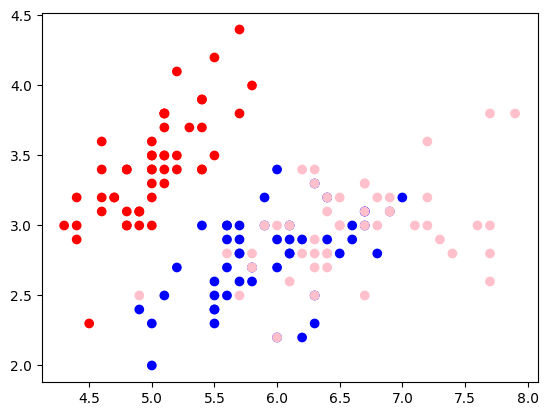

In [45]:
plt.scatter(data.sepal_length, data.sepal_width, c=data.species_color)
plt.show()

# Grafico de barras

Variables discretas (diagramas de frecuencias)

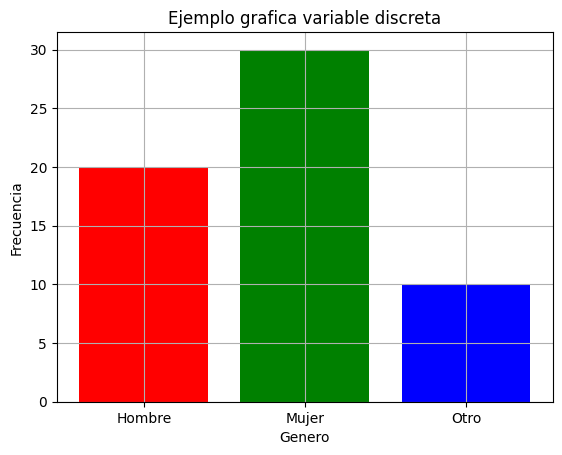

In [48]:
gender = ['Hombre', 'Mujer', 'Otro']
quantity = [20,30,10]

plt.bar(gender,quantity,color=['red', 'green','blue'])
plt.xlabel("Genero")
plt.ylabel("Frecuencia")
plt.grid()
plt.title("Ejemplo grafica variable discreta")
plt.show()

# Histogramas
Simboliza la distribucion de un conjunto de datos (continuo). Sirve para optener una primera vista de una distribucion de la poblacion (cuantitativa continua)

### p-valores e intervalos de confianza

In [50]:
import seaborn as sns

In [51]:
from sklearn.datasets import fetch_openml

In [52]:
titanic = fetch_openml('titanic', version=1)
titanic

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':       pclass                                             name     sex  \
 0        1.0                    Allen, Miss. Elisabeth Walton  female   
 1        1.0                   Allison, Master. Hudson Trevor    male   
 2        1.0                     Allison, Miss. Helen Loraine  female   
 3        1.0             Allison, Mr. Hudson Joshua Creighton    male   
 4        1.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
 ...      ...                                              ...     ...   
 1304     3.0                             Zabour, Miss. Hileni  female   
 1305     3.0                            Zabour, Miss. Thamine  female   
 1306     3.0                        Zakarian, Mr. Mapriededer    male   
 1307     3.0                              Zakarian, Mr. Ortin    male   
 1308     3.0                               Zimmerman, Mr. Leo    male   
 
           age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
 0     29.0000    0.0 

In [54]:
titanic_df = pd.DataFrame(data=titanic['data'])
titanic_df.sample(3)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
316,1.0,"Williams, Mr. Charles Duane",male,51.0,0.0,1.0,PC 17597,61.3792,NaN,C,NaN,NaN,"Geneva, Switzerland / Radnor, PA"
314,1.0,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,1.0,1.0,113503,211.5000,C80,C,4,NaN,"Elkins Park, PA"
1169,3.0,"Saether, Mr. Simon Sivertsen",male,38.5,0.0,0.0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,32.0,NaN


In [55]:
titanic_df.shape

(1309, 13)

In [56]:
titanic_df['age'].isna().sum()

263

<Axes: >

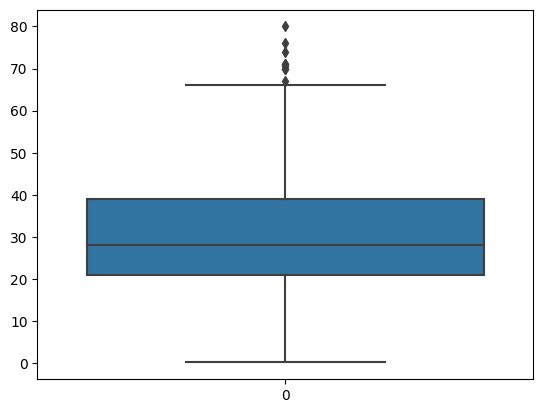

In [58]:
sns.boxplot(data=titanic_df['age'])

<Axes: xlabel='age', ylabel='Count'>

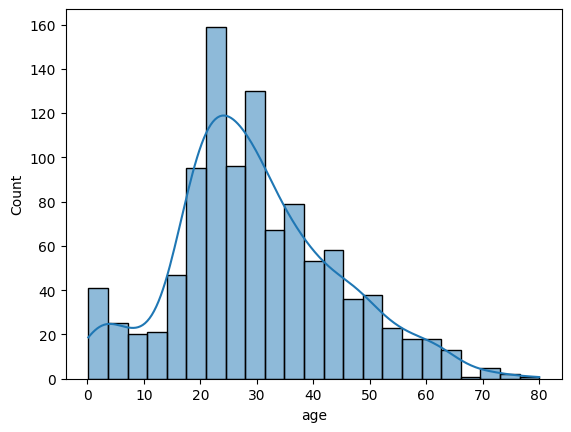

In [61]:
sns.histplot(x=titanic_df['age'], kde=True)